In [2]:
#firstly to impoort necessary libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import re
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from IPython.display import display, HTML # too keep my dataframe scrollable during project



In [27]:
#download and import stopwords maybe we would use for cleansing
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
# download wordcloud
!pip install wordcloud
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to C:\Users\VR
[nltk_data]     STORE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#usable function for the scrollable feature.
def display_dataframe_with_scrollbar(df, max_height=400):
   
    # Create HTML string with styles for scrollbar
    html = f"""
    <div style="max-height: {max_height}px; overflow-y: auto;">
        {df.to_html(classes='table table-striped table-bordered', escape=False)}
    </div>
    """
    # Display the HTML
    display(HTML(html))

In [4]:
#read csv twitter file
amazon_df = pd.read_csv(r"F:\data analysis\Sentiment analysis\amazon_reviews.csv")

In [5]:

display_dataframe_with_scrollbar(amazon_df)


,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you. I like being able to turn lights on and off while away from home.",1
3,5,31-Jul-18,Charcoal Fabric,"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.",1
4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,31-Jul-18,Heather Gray Fabric,"I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.",1
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use. It IS a great alarm. If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response. She does not seem to be very smartbon politics yet.",1
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'm working on getting one in every room of my house. I really like what features they offer specifily playing music on all Echos and controlling the lights throughout my house.,1
8,5,30-Jul-18,Heather Gray Fabric,looks great,1
9,5,30-Jul-18,Heather Gray Fabric,"Love it! I’ve listened to songs I haven’t heard since childhood! I get the news, weather, information! It’s great!",1


In [6]:
#download and import stopwords maybe we would use for cleansing
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to C:\Users\VR
[nltk_data]     STORE\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [7]:
# 1st telling statistics about data
amazon_df.describe()
#notice here rating is between 1-5 and feedback is from 0 to 1


,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [11]:
# 1st telling statistics about data
amazon_df.describe()
#notice here rating is between 1-5 and feedback is from 0 to 1

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [13]:
print(amazon_df.isnull().value_counts())
#notice verified_reviews only has 1 null value which maybe can be deleted
print(amazon_df[amazon_df['verified_reviews'].isnull()== True])

rating  date   variation  verified_reviews  feedback
False   False  False      False             False       3149
                          True              False          1
Name: count, dtype: int64
     rating       date variation verified_reviews  feedback
473       2  29-Jun-18     White              NaN         0


In [14]:
#proceed to delete the null values in (verified_reviews) column
amazon_df.dropna(subset=['verified_reviews'], inplace=True)
#we may need also to remove some cols like date and variation
amazon_df.drop(['date','variation'], axis =1, inplace=True)
print(amazon_df.isnull().value_counts())
#Now we good to Gooooooo

rating  verified_reviews  feedback
False   False             False       3149
Name: count, dtype: int64


In [15]:
#let's add column that calculate length of  verified_reviews
amazon_df['length'] = amazon_df['verified_reviews'].apply(len)
#statistics about length column :-
amazon_df.describe()

,rating,feedback,length
count,3149.000000,3149.000000,3149.000000
mean,4.463957,0.918704,132.090187
std,1.067773,0.273332,182.114569
min,1.000000,0.000000,1.000000
25%,4.000000,1.000000,30.000000
50%,5.000000,1.000000,74.000000
75%,5.000000,1.000000,165.000000
max,5.000000,1.000000,2851.000000


Now it's time to do some EDA

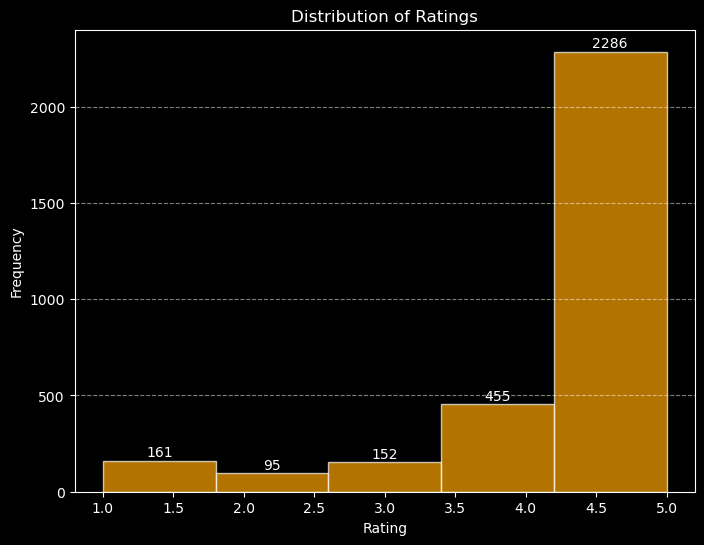

In [21]:
# let's visualize distribution of Rating
plt.style.use('dark_background')

# Create a figure with a specific size
plt.figure(figsize=(8, 6))

# Plot the histogram
patches, bins, _ = plt.hist(amazon_df['rating'], bins=5, color='orange', edgecolor='white', alpha=0.7)

# Plot the value labels
for i in range(len(patches)):
    plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, patches[i] + 20, int(patches[i]), ha='center', color='white')

# Customize labels and title
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show plot
plt.show()
#most rating are 5 star wowo!!

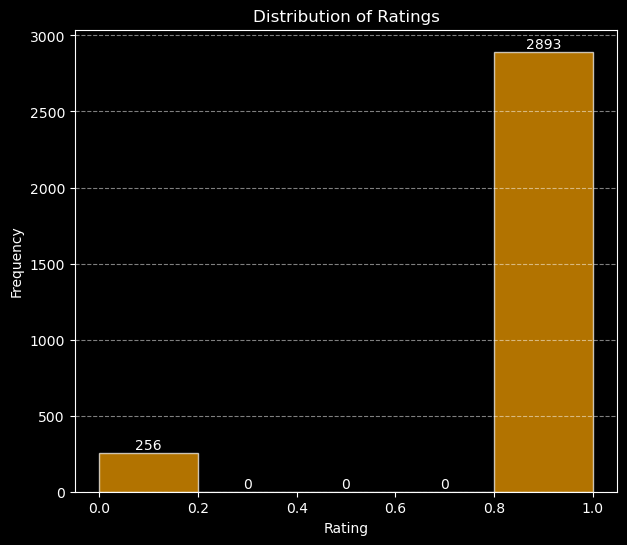

In [25]:
# let's visualize distribution of feedback
plt.style.use('dark_background')

# Create a figure with a specific size
plt.figure(figsize=(7, 6))

# Plot the histogram
patches, bins, _ = plt.hist(amazon_df['feedback'], bins=5, color='orange', edgecolor='white', alpha=0.7)

# Plot the value labels
for i in range(len(patches)):
    plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, patches[i] + 20, int(patches[i]), ha='center', color='white')

# Customize labels and title
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show plot
plt.show()

#here we can tell that mos feedback have values of 1 which means positive feedback

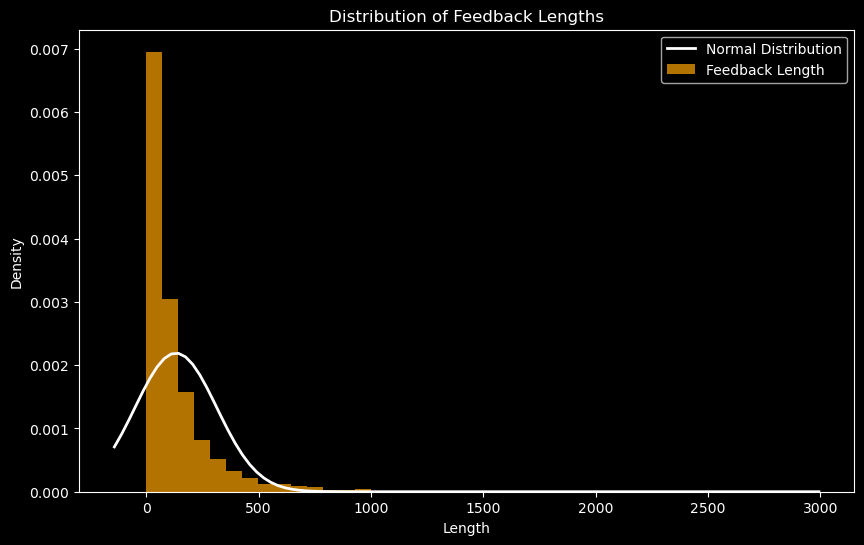

In [26]:

# Set the style and background color
plt.style.use('dark_background')

# Create a figure with a specific size
plt.figure(figsize=(10, 6))

# Plot the histogram
patches, bins, _ = plt.hist(amazon_df['length'], bins=40, color='orange', alpha=0.7, density=True)

# Fit a normal distribution
mu, std = stats.norm.fit(amazon_df['length'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)

# Plot the normal distribution curve
plt.plot(x, p, 'white', linewidth=2)

# Customize labels and title
plt.xlabel('Length')
plt.ylabel('Density')
plt.title('Distribution of Feedback Lengths')

# Add a legend
plt.legend(['Normal Distribution', 'Feedback Length'])

# Show plot
plt.show()
#notice here the distribution is not at all normal as the statistics before tell

In [29]:
#Now let's join all verified feedbacks as positive and negative in 2 senteces only
negative_feedback = ' '.join(amazon_df[amazon_df['feedback']==0]['verified_reviews'])

positive_feedback = ' '.join(amazon_df[amazon_df['feedback']==1]['verified_reviews'])


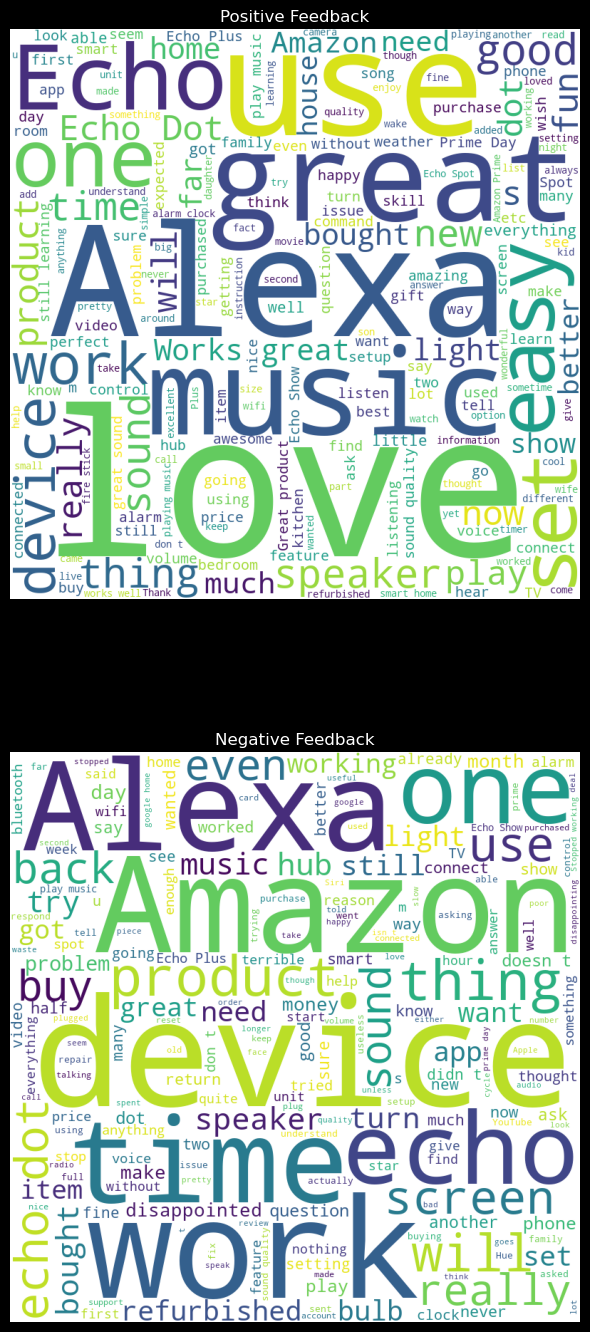

In [31]:
#let's now visualize wordcloud for positive and negative
fig,ax=plt.subplots(2, 1, figsize=(6, 15))
wrd_cld1 = WordCloud(width=800, height=800, background_color='white').generate(positive_feedback)
wrd_cld2 = WordCloud(width=800, height=800, background_color='white').generate(negative_feedback)
ax[0].imshow(wrd_cld1)
ax[0].axis('off')  # Hide the axes
ax[0].set_title('Positive Feedback')
ax[1].imshow(wrd_cld2)
ax[1].axis('off')  # Hide the axes
ax[1].set_title('Negative Feedback')

plt.tight_layout()
plt.show()

*we notice here that #positive feed back are like :love great, happy, etc while #negative comments are :disappointed, terriple *

 let's traaaaaaaaaaain our model !!!
 

In [32]:
#define class for deleting punctuations from text
class punc_trans(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X.apply(lambda text: re.sub(r'[^\w\s]','',text))
#define class for deleting stopwords from text

class stopwords_trans(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        stp_wrds = stopwords.words('english')
        return X.apply(lambda text: ' '.join([word for word in text.split() if word.lower() not in stp_wrds]))
#define class for generating vectorization of (string text) data 

class vecto_trans(BaseEstimator, TransformerMixin):
    def __init__(self):
         self.vectoriser = CountVectorizer()
    def fit(self, X, y=None):
        self.vectoriser.fit(X)
        return self
    def transform(self, X):
        return self.vectoriser.transform(X)
#defining the values of tested data
x= amazon_df['verified_reviews']
y= amazon_df['feedback']
#splitting data
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, train_size = .8, random_state =64)
#compining all classes in one pipline
fin_pipeline1 = Pipeline(steps=[('punc_transformer', punc_trans()),
                               ('stopwords_transformer', stopwords_trans()),
                               ('vecto_transformer', vecto_trans()),
                               ('nominal_model', MultinomialNB())
                              ])
#fitting model
fin_pipeline1.fit(Xtrain,Ytrain)
#predicting..........
y_pred = fin_pipeline1.predict(Xtest)
#testing the model
print( classification_report(Ytest,y_pred ), '\n')
print(confusion_matrix(Ytest,y_pred ))

              precision    recall  f1-score   support

           0       0.88      0.31      0.46        48
           1       0.95      1.00      0.97       582

    accuracy                           0.94       630
   macro avg       0.91      0.65      0.72       630
weighted avg       0.94      0.94      0.93       630
 

[[ 15  33]
 [  2 580]]


Notice here the model is something good for positive feedbacks , however itsnot so good for negative ones
            precision    recall    f1-score      support

0            0.88        0.31          0.46        48
1            0.95        1.00          0.97       582